In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your cleaned dataset (replace 'cleaned_dataset.csv' with the actual file name)
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Assuming 'target' is the column you want to predict
target_column = 'Prediction'

# Split the dataset into features (X) and target variable (y)
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.97
Confusion Matrix:
 [[720  19]
 [  8 288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.94      0.97      0.96       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



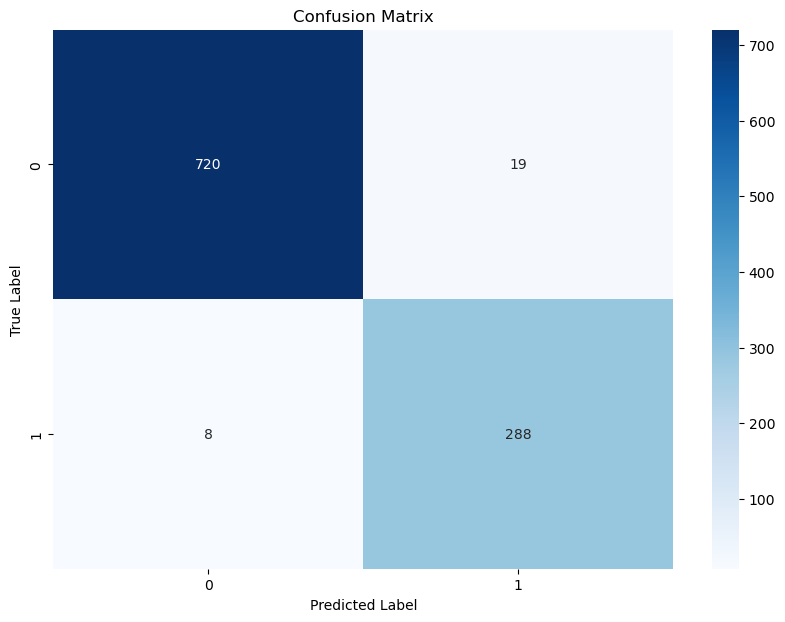

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

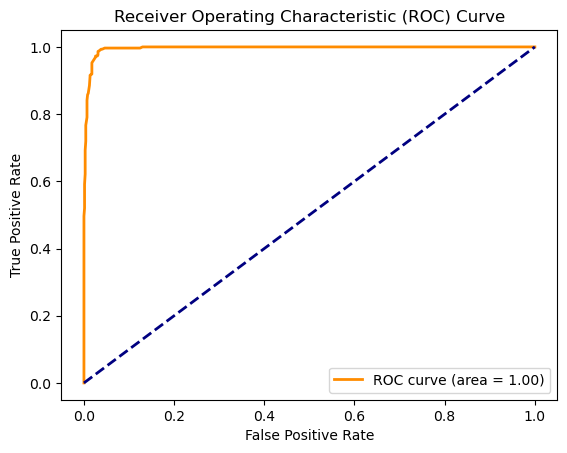

In [3]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

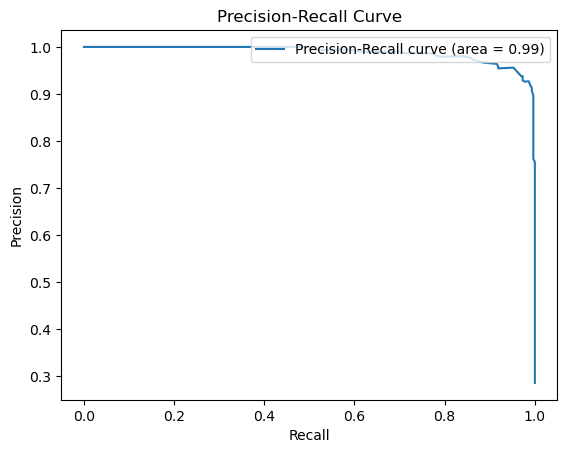

In [5]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

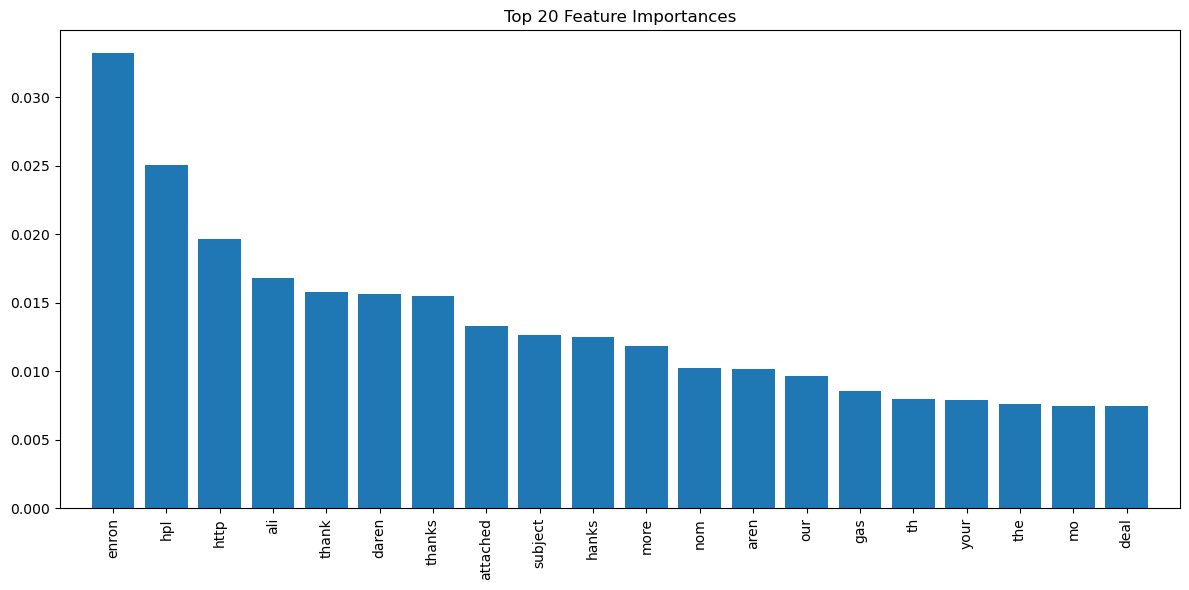

In [10]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

importances = clf.feature_importances_
# Get the indices of the top 20 features
indices = np.argsort(importances)[-20:]
# Arrange them in descending order
sorted_indices = indices[::-1]

# Plot the top 20 feature importances
plt.figure(figsize=(12, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_indices)), X.columns[sorted_indices], rotation=90)
plt.xlim([-1, len(sorted_indices)])
plt.tight_layout()
plt.show()